# Analysis of results from experimental campaign

This notebook explores and visualize the results on `MicroGridEnv` adopting different strategies. The results are retrieved from some `json`files employed to store the outcome from the testing of each tested algorithm. <br>
The plots shown here have been also used within the paper.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ../..

/Users/dave/Library/CloudStorage/OneDrive-PolitecnicodiMilano/PhD/Repositories/ernesto-gym


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.transforms import Bbox
import pandas as pd
from tqdm import tqdm 
from datetime import datetime
import os
import orjson as json
from pathlib import Path
from collections import OrderedDict

from ernestogym.envs import MicroGridEnv
from ernestogym.envs.single_agent.utils import parameter_generator

sns.set_style('darkgrid')
plot_colors = sns.color_palette()
sns.set(font_scale=1.4)

plots_dir = 'examples/single_agent/plots/ijcnn25'
os.makedirs(plots_dir, exist_ok=True)

In [3]:
alg_color = OrderedDict({
    'random': plot_colors[0],
    'only_market': plot_colors[1],
    'battery_first': plot_colors[2],
    '20-80': plot_colors[3],
    '50-50': plot_colors[4],
    '80-20': plot_colors[5],
    'ppo': plot_colors[0],
    'a2c': plot_colors[6],
    'sac': plot_colors[7],
    'ppo_fixed_market_tamb': plot_colors[6],
    'ppo_fixed_tamb': plot_colors[7],
    'ppo_25eps': plot_colors[9]
})

alg_markers = OrderedDict({
    'random': '.',
    'only_market': 'o',
    'battery_first': 'v',
    '20-80': 's',
    '50-50': 'P',
    '80-20': 'D',
    'ppo': '*',
    'a2c': '+',
    'sac': '<',
    'ppo_fixed_market_tamb': '+',
    'ppo_fixed_tamb': '>',
    'ppo_25eps': ''
})

In [10]:
exp_name_1 = "prova_askx1-BUONO"
exp_name_2 = "BEST-IJCNN_2015-2020_deg_new-norm_clip0_1_socmax_gamma0_99_new-market"
folder_1 = "./logs/{}/results/".format(exp_name_1)
folder_2 = "./logs/{}/results/".format(exp_name_2)

In [11]:
algs = ['battery_first']

In [12]:
def load_results_folder_1(alg:str):

    alg_res = []

    results_folder = folder_1 + alg +'/'
    tests_files = [f for f in os.listdir(results_folder)]

    for file in tqdm(tests_files):
        f = open (results_folder + file, "r")
        data = json.loads(f.read())
        alg_res.append(data)

    return alg_res

def load_results_folder_2(alg:str):

    alg_res = []

    results_folder = folder_2 + alg +'/'
    tests_files = [f for f in os.listdir(results_folder)]

    for file in tqdm(tests_files):
        f = open (results_folder + file, "r")
        data = json.loads(f.read())
        alg_res.append(data)

    return alg_res

In [13]:
res_dict = {}

for alg in algs:
    res_dict['folder_1'] = load_results_folder_1(alg)
    res_dict['folder_2'] = load_results_folder_2(alg)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:40<00:00,  1.43s/it]


In [14]:
res_dict['folder_1'][0].keys()
len(res_dict['folder_1'][0]['states'])

8760

In [15]:
res_dict['folder_2'][0].keys()
len(res_dict['folder_2'][0]['states'])

8760

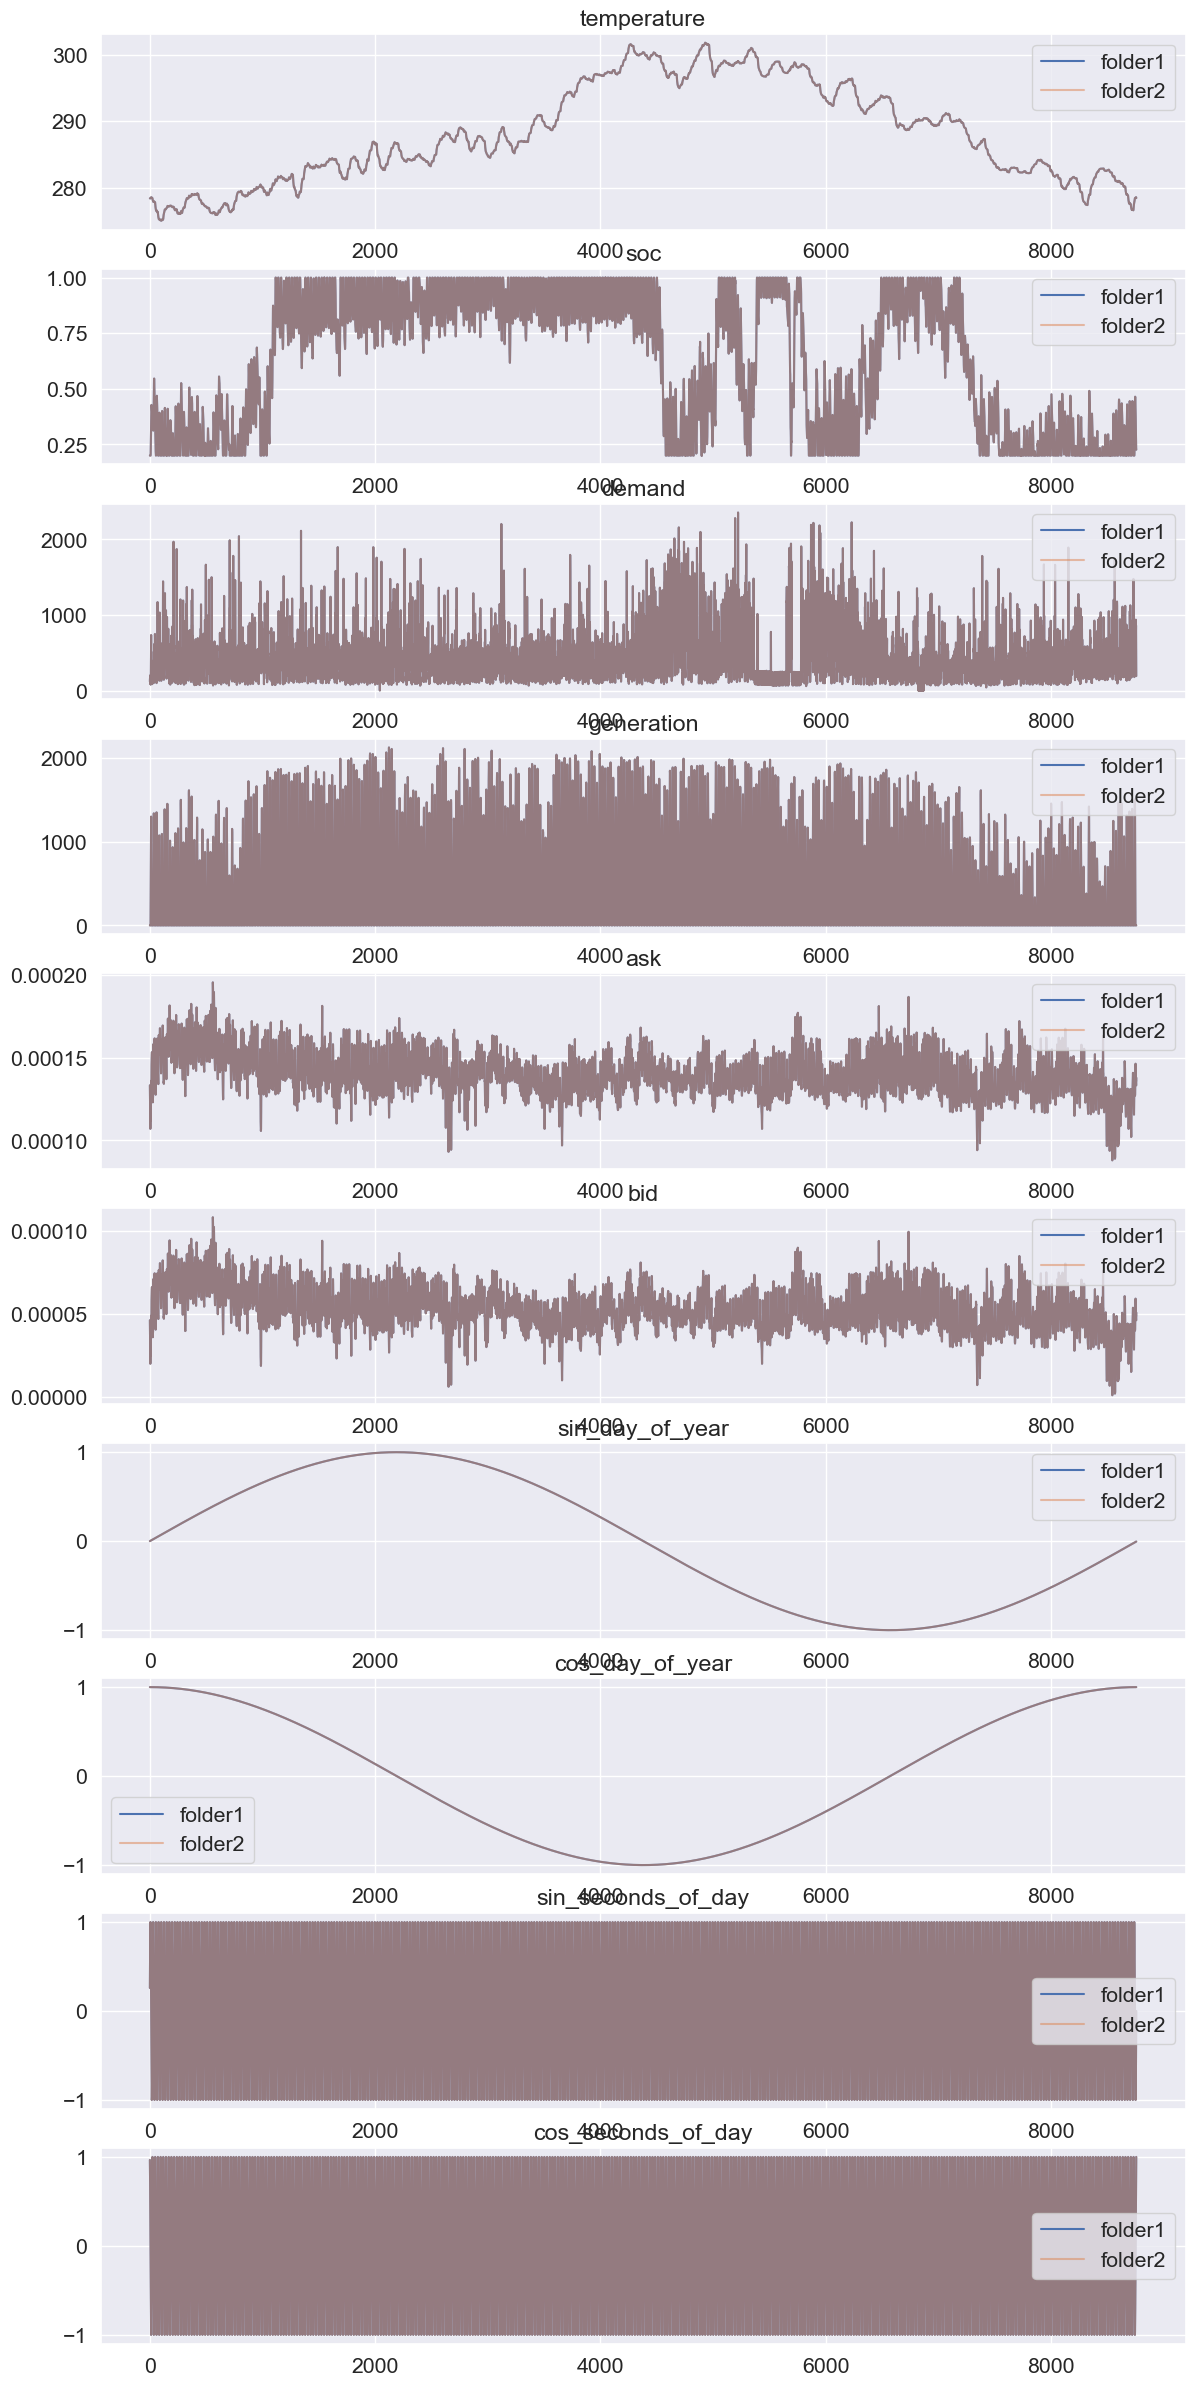

In [16]:
fig, ax = plt.subplots(10, 1, figsize=(14,30))

state_vars = ['temperature', 'soc', 'demand', 'generation', 'ask', 'bid', 
               'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', ]

for i in range(10):
    ax[i].plot([elem[i] for elem in res_dict['folder_1'][5]['states']], label='folder1')
    ax[i].plot([elem[i] for elem in res_dict['folder_2'][5]['states']], label='folder2', alpha=0.5)
    ax[i].legend()
    ax[i].set_title(state_vars[i])

In [8]:
res_dict['folder_2'][0].keys()

KeyError: 'folder_2'

KeyError: 'folder_1'

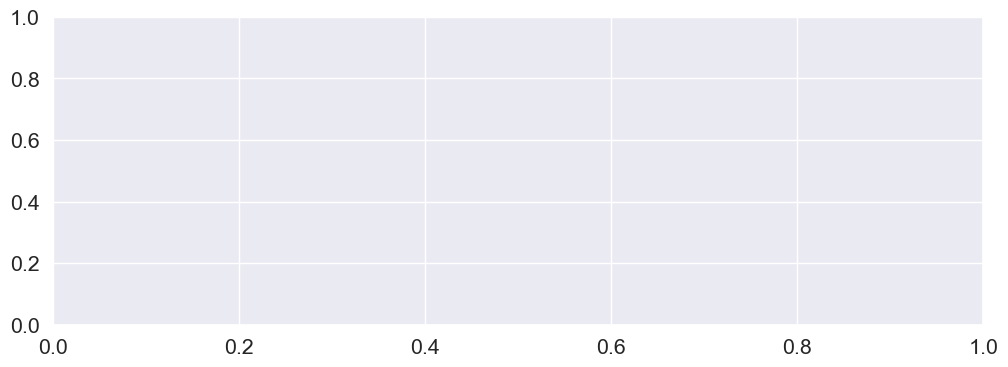

In [9]:
fig, ax = plt.subplots(figsize=(12,4))

state_vars = ['temperature', 'soc', 'demand', 'generation', 'ask', 'bid', 
               'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', ]

ax.plot([elem for elem in res_dict['folder_1'][3]['soh']], label='folder1')
ax.plot([elem for elem in res_dict['folder_2'][3]['soh']], label='folder2', alpha=0.5)
ax.legend()

In [49]:
res_dict['folder_1'][3]['states'][0][1]

0.20000000298023224

In [48]:
res_dict['folder_2'][3]['states'][0][1]

0.20000000298023224